### Training and Evaluating the of the Model

In this notebook, the model is trained using the preprocessed training data and an initial configuration. The model is then evaluated based on the test data and continuously optimized by adjusting the hyperparameters. The goal is to find the best hyperparameters for the model to achieve the best possible performance. 

In [40]:
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# Set all random seeds to a fixed value to make the results reproducible
seed_value = 42
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

In [42]:
# Load the dataset
data = pd.read_csv('../data/processed/preprocessed_data.csv')

features = data.drop('Anzahl_der_Fahrzeuge', axis=1)
target = data['Anzahl_der_Fahrzeuge']

# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=seed_value)

In [43]:
def build_sequential_model(num_layers, neurons_per_layer, activation_function, input_shape, optimizer, loss_function, metrics):
    model = models.Sequential()

    model.shape = (input_shape, )

    for i in range(num_layers):
        model.add(layers.Dense(neurons_per_layer, activation=activation_function, name=f'hidden_layer_{i+1}'))

    model.add(layers.Dense(1, activation='relu', name='output'))

    model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

    return model

In [44]:
def show_model_structure(input_model, input_shape):
    # Building the model in order to visualize the structure
    input_model.build(input_shape=(None, input_shape))

    # Printing a summary of the model
    input_model.summary()
    
def plot_model(input_model):
    return utils.plot_model(input_model, show_shapes=True, show_layer_names=True, show_trainable=True, show_layer_activations=True, expand_nested=True, dpi=96)

In [45]:
def plot_history(model_history):
    training_loss = model_history.history['loss']
    validation_loss = model_history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)
    
    # Plot the training and validation loss
    plt.plot(epochs, training_loss, 'r--', label='Training loss')
    plt.plot(epochs, validation_loss, 'b-', label='Validation loss')
    plt.title('Training & validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def show_examplary_predictions(model, features_test, target_test):
    predictions = model.predict(features_test)
    predictions = predictions.flatten()
    predictions = np.round(predictions)
    
    results = pd.DataFrame({'Predicted': predictions, 'Actual': target_test})
    results = results.astype({'Actual': 'int32', 'Predicted': 'int32'})

    # The difference between the actual and predicted values in percent    
    results['Difference (%)'] = ((results['Actual'] - results['Predicted']) / results['Actual']) * 100

    results['Difference (%)'] = results['Difference (%)'].round(0).astype('int32')

    results['Difference (%)'] = results['Difference (%)'].abs()
    
    return results

In [46]:
first_model = build_sequential_model(
    num_layers=2,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

show_model_structure(first_model, features_train.shape[1])
# plot_model(first_model)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47575.2930 - mse: 47577.0625 - val_loss: 45558.9336 - val_mse: 46493.9492
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 41492.2734 - mse: 41494.7344 - val_loss: 26849.1816 - val_mse: 27489.2852
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 20413.6504 - mse: 20414.8398 - val_loss: 11860.4814 - val_mse: 12208.4688
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 11211.6621 - mse: 11212.2227 - val_loss: 11370.1621 - val_mse: 11701.8857
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 10947.9824 - mse: 10948.5137 - val_loss: 11178.9688 - val_mse: 11509.3682
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 10774.6787 - mse: 10775.1885 - val_loss: 11033.9238 - val_mse: 11363.8711
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 10637.1123 - mse: 10637.6035 - val_loss: 10912.6201 - val_mse: 11242.3594
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 1052

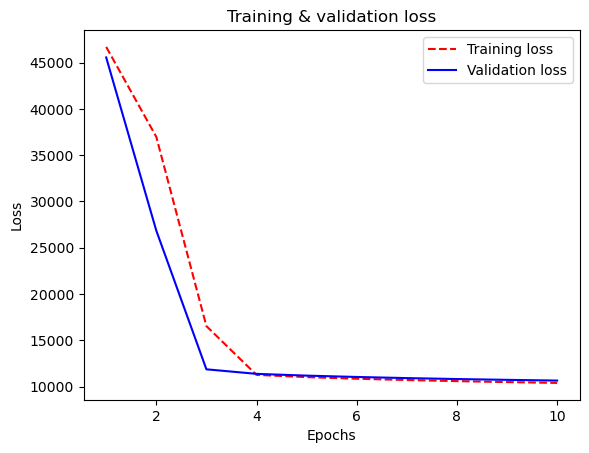

In [47]:
history = first_model.fit(features_train, target_train, epochs=10, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [48]:
example_predictions = show_examplary_predictions(first_model, features_test, target_test)
example_predictions.head(10)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Predicted,Actual,Difference (%)
867,224,130,72
1221,251,564,55
874,232,77,201
354,101,214,53
599,186,175,6
2559,145,282,49
309,158,103,53
2155,263,309,15
2337,318,463,31
479,106,83,28


In [49]:
# Calculate the average difference between the actual and predicted values but use the absolute values
average_difference = example_predictions['Difference (%)'].abs().mean()
print(f'The average difference between the actual and predicted values is {average_difference:.2f}%')

The average difference between the actual and predicted values is 71.63%


#### First Optimization with more Layers and Epochs

In the first optimization step, the number of layers and epochs are doubled.

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44868.9180 - mse: 44871.8555 - val_loss: 14730.5859 - val_mse: 14967.4619
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 11951.3584 - mse: 11951.8838 - val_loss: 10849.0098 - val_mse: 11162.2861
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 10369.1748 - mse: 10369.5342 - val_loss: 10389.7354 - val_mse: 10690.6963
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 9970.7754 - mse: 9971.0234 - val_loss: 10064.1758 - val_mse: 10343.6309
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 9693.0195 - mse: 9693.1719 - val_loss: 9804.1914 - val_mse: 10058.3154
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 9474.2793 - mse: 9474.3389 - val_loss: 9549.9785 - val_mse: 9774.0205
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 9278.9062 - mse: 9278.8945 - val_loss: 9322.3672 - val_mse: 9522.6709
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 9122.4365 - mse: 

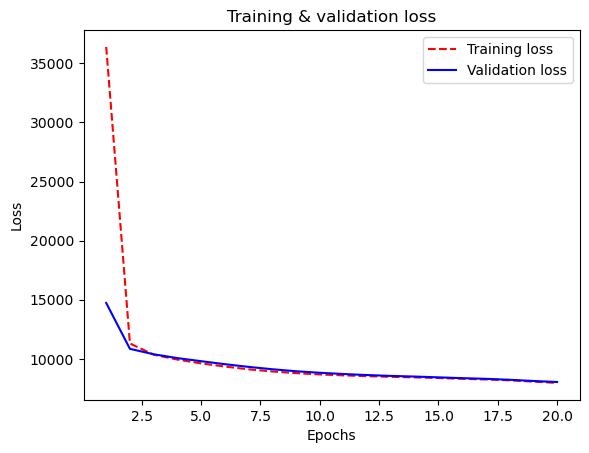

In [50]:
second_model = build_sequential_model(
    num_layers=4,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = second_model.fit(features_train, target_train, epochs=20, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [51]:
example_predictions = show_examplary_predictions(second_model, features_test, target_test)
average_difference = example_predictions['Difference (%)'].mean()
print(f'The average difference between the actual and predicted values is {average_difference:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The average difference between the actual and predicted values is 52.75%


#### Second Optimization with more Epochs

In the second optimization step, the number of epochs is increased to 100 to see at which point the model starts to overfit.

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45933.6875 - mse: 45937.2383 - val_loss: 12116.9453 - val_mse: 12436.7334
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 11544.1250 - mse: 11544.6641 - val_loss: 10853.6846 - val_mse: 11159.7549
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 10376.1133 - mse: 10376.4639 - val_loss: 10253.1689 - val_mse: 10550.0264
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 9886.0010 - mse: 9886.2070 - val_loss: 9809.8096 - val_mse: 10087.8213
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 9524.9268 - mse: 9525.0039 - val_loss: 9473.1533 - val_mse: 9723.9697
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 9263.5117 - mse: 9263.5039 - val_loss: 9205.6436 - val_mse: 9431.4727
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 9065.5840 - mse: 9065.5127 - val_loss: 9010.4258 - val_mse: 9215.9453
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 8929.8281 -

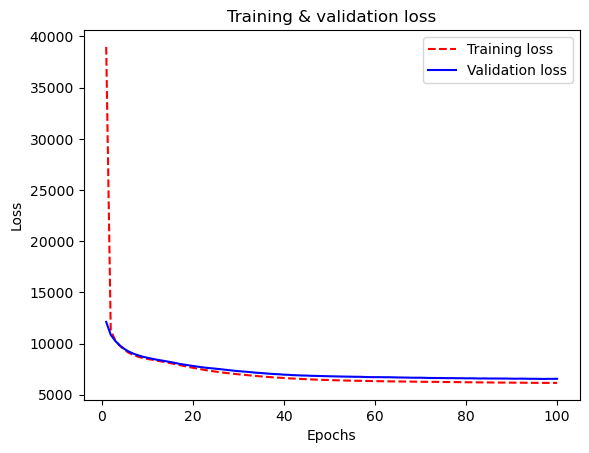

In [52]:
third_model = build_sequential_model(
    num_layers=4,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = third_model.fit(features_train, target_train, epochs=100, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [53]:
third_example_predictions = show_examplary_predictions(third_model, features_test, target_test)
third_average_difference = third_example_predictions['Difference (%)'].mean()
print(f'The average difference between the actual and predicted values is {third_average_difference:.2f}%')
third_example_predictions.head(10)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The average difference between the actual and predicted values is 49.06%


,Predicted,Actual,Difference (%)
867,173,130,33
1221,378,564,33
874,140,77,82
354,106,214,50
599,221,175,26
2559,197,282,30
309,146,103,42
2155,254,309,18
2337,445,463,4
479,130,83,57


#### Third Optimization with more Neurons per Layer
In the third optimization step, the number of hidden layers is increased to 5 to see if the model can be further improved.

Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44295.9961 - mse: 44298.9297 - val_loss: 11929.4268 - val_mse: 12247.1729
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 10965.7354 - mse: 10966.0186 - val_loss: 10388.0557 - val_mse: 10667.5586
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 9946.1963 - mse: 9946.2998 - val_loss: 9747.4199 - val_mse: 9999.2979
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 9441.6348 - mse: 9441.6055 - val_loss: 9246.4463 - val_mse: 9464.8438
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 9080.0654 - mse: 9079.9492 - val_loss: 8886.5723 - val_mse: 9081.9531
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 8844.0586 - mse: 8843.8887 - val_loss: 8623.8184 - val_mse: 8809.1963
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 8657.4482 - mse: 8657.2412 - val_loss: 8400.7119 - val_mse: 8580.2783
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 8477.8037 - mse: 8477.57

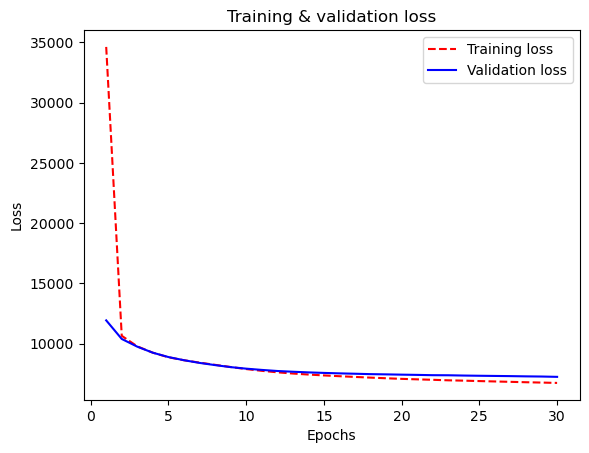

In [54]:
fourth_model = build_sequential_model(
    num_layers=5,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = fourth_model.fit(features_train, target_train, epochs=30, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [55]:
# Save the third model
keras_model_path = '../models/prediction_model.keras'
third_model.save(keras_model_path)

In [56]:
# save the third example predictions
third_example_predictions.to_csv('../data/predictions/third_example_predictions.csv', index=False)